<a href="https://colab.research.google.com/github/Jayand97/DSA-Assignment/blob/main/Jayand_Loan_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
trdata = pd.read_csv('/content/train_ctrUa4K.csv')
tsdata= pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
trdata.shape

(614, 13)

In [ ]:
tsdata.shape

(367, 12)

In [ ]:
trdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
tsdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
trdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
tsdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
tsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Exploratory Data Analysis

In [ ]:
trdata.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Status', ylabel='count'>

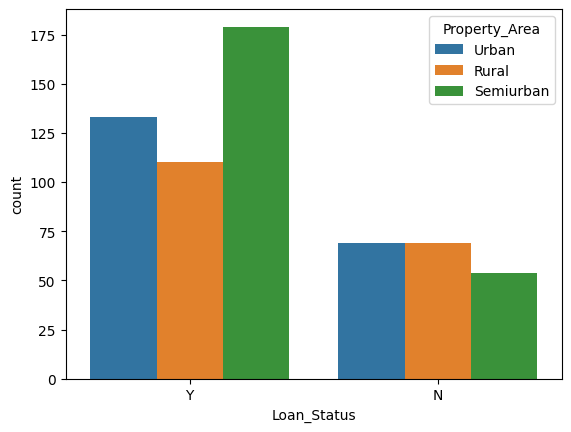

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Property_Area")

<Axes: xlabel='Loan_Status', ylabel='count'>

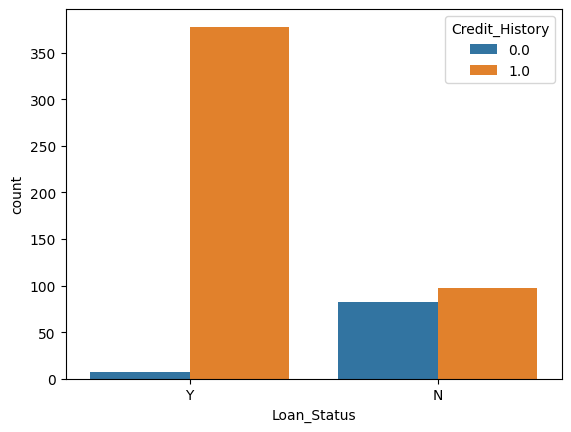

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Credit_History")

<Axes: xlabel='Loan_Status', ylabel='count'>

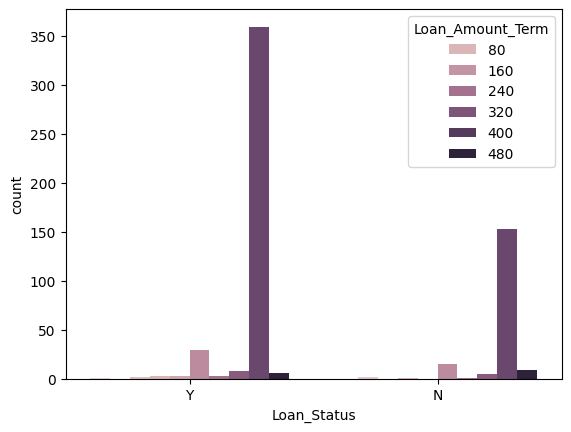

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Loan_Amount_Term")

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

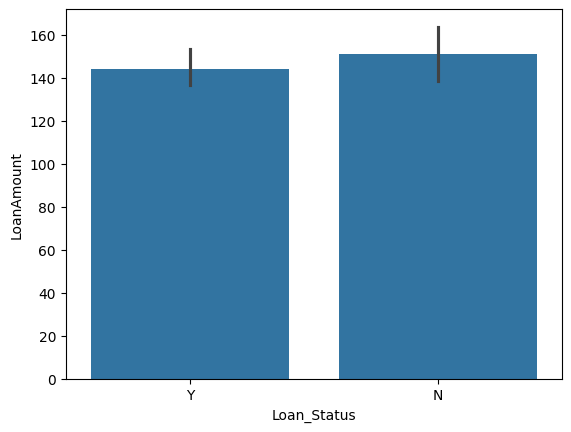

In [ ]:
sns.barplot(data=trdata , x="Loan_Status", y = "LoanAmount")

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

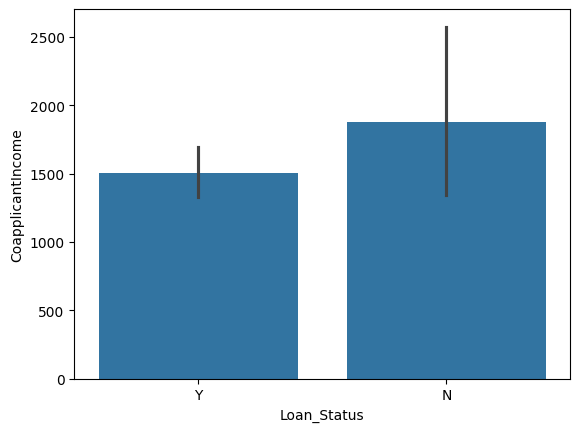

In [ ]:
sns.barplot(data=trdata , x="Loan_Status", y = "CoapplicantIncome")

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

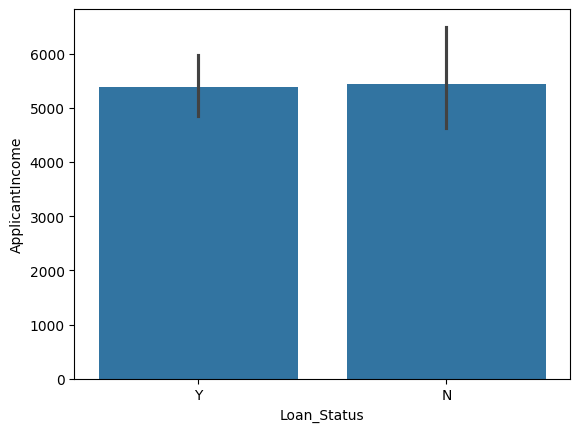

In [ ]:
sns.barplot(data=trdata , x="Loan_Status", y = "ApplicantIncome")

<Axes: xlabel='Loan_Status', ylabel='count'>

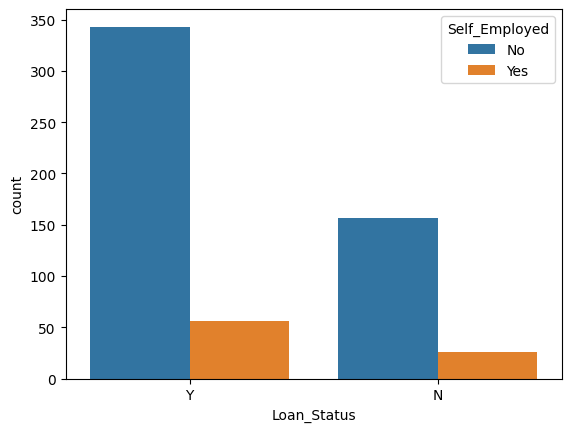

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Self_Employed")

<Axes: xlabel='Loan_Status', ylabel='count'>

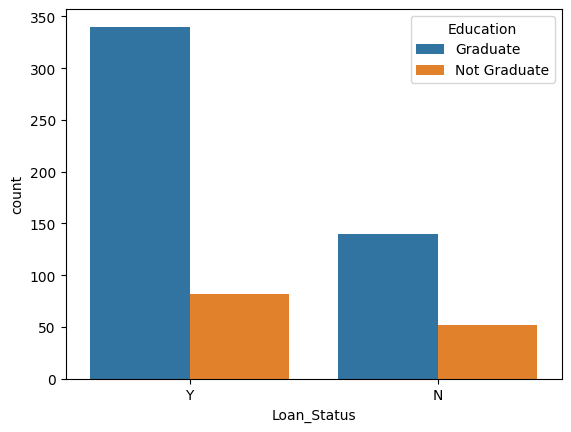

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Education")

<Axes: xlabel='Loan_Status', ylabel='count'>

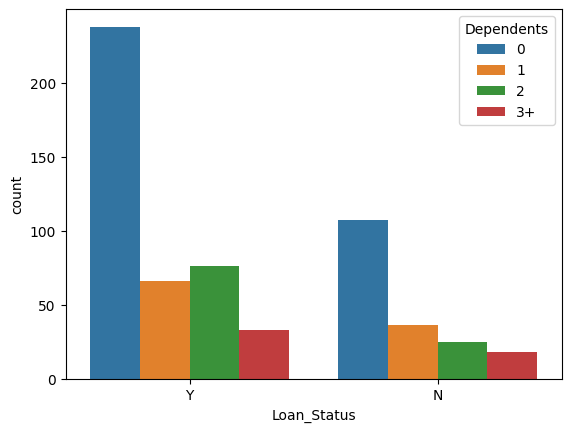

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Dependents")

<Axes: xlabel='Loan_Status', ylabel='count'>

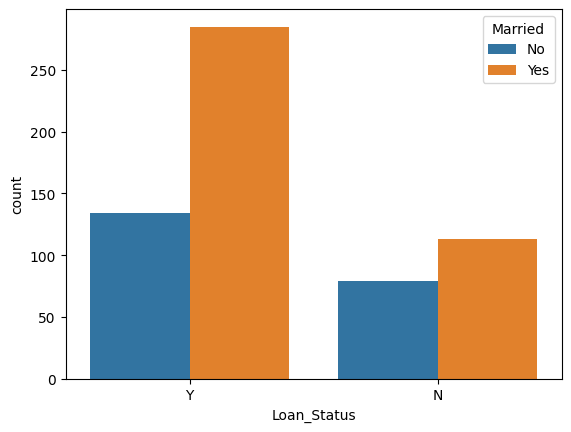

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Married")

<Axes: xlabel='Loan_Status', ylabel='count'>

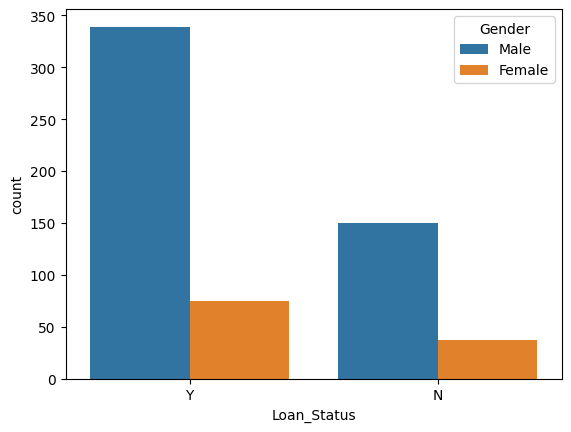

In [ ]:
sns.countplot(data=trdata , x="Loan_Status", hue = "Gender")

In [ ]:
trdata.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
tsdata.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
trdata['Loan_ID'] = trdata['Loan_ID'].str.replace('LP00', '')
tsdata['Loan_ID'] = tsdata['Loan_ID'].str.replace('LP00', '')

Missing Data handling

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
trdata['Gender']=label_encoder.fit_transform(trdata['Gender'])
trdata['Gender'].unique()
trdata['Married']=label_encoder.fit_transform(trdata['Married'])
trdata['Married'].unique()
trdata['Dependents']=label_encoder.fit_transform(trdata['Dependents'])
trdata['Dependents'].unique()
trdata['Education']=label_encoder.fit_transform(trdata['Education'])
trdata['Education'].unique()
trdata['Self_Employed']=label_encoder.fit_transform(trdata['Self_Employed'])
trdata['Self_Employed'].unique()
trdata['Property_Area']=label_encoder.fit_transform(trdata['Property_Area'])
trdata['Property_Area'].unique()
trdata['Loan_Status']=label_encoder.fit_transform(trdata['Loan_Status'])
trdata['Loan_Status'].unique()

array([1, 0])

In [ ]:
trdata.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_test['Gender'] = le.fit_transform(X_test['Gender'])

<Axes: xlabel='ApplicantIncome'>

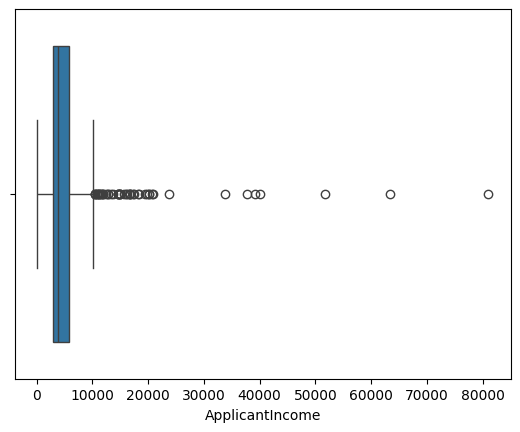

In [ ]:
sns.boxplot(x=trdata['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

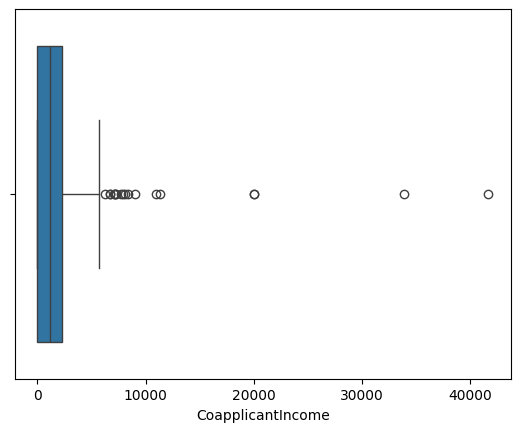

In [ ]:
sns.boxplot(x=trdata['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

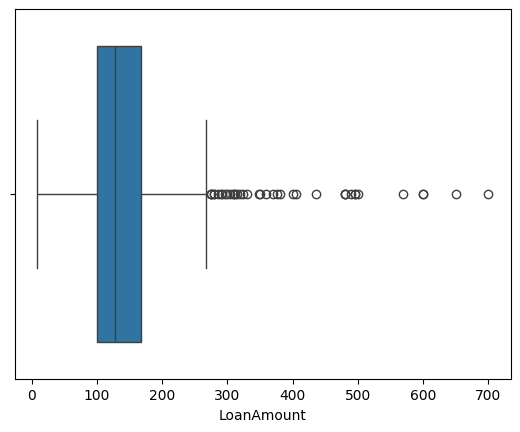

In [ ]:
sns.boxplot(x=trdata['LoanAmount'])

In [ ]:
corr = trdata.corr()
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.006325,-0.018317,0.056065,0.037547,0.004935,0.019331,0.039516,0.038447,-0.030481,-0.032910,-0.158826,0.011958
Gender,-0.006325,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.137736,-0.068536,-0.000515,-0.030903,0.008690
Married,-0.018317,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.148922,-0.097345,0.010690,0.007973,0.096657
Dependents,0.056065,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.134371,-0.074783,-0.079801,0.032600,-0.007318
Education,0.037547,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,-0.065243,-0.085884
Self_Employed,0.004935,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.091348,-0.037492,0.056894,-0.013439,0.010880
ApplicantIncome,0.019331,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.039516,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.038447,0.137736,0.148922,0.134371,-0.171133,0.091348,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.030481,-0.068536,-0.097345,-0.074783,-0.078784,-0.037492,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268


Data Corelation

<Axes: >

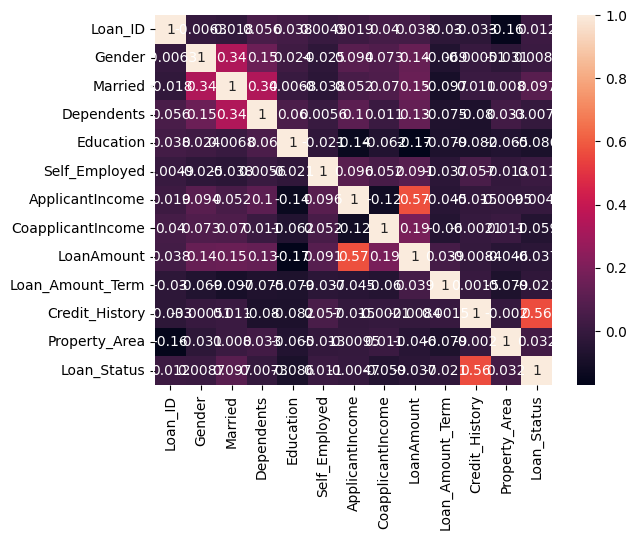

In [ ]:
sns.heatmap(trdata.corr(),annot= True)

In [ ]:
##Creating dummy variables for Property column

property_area = pd.get_dummies(trdata['Property_Area'], prefix='Property_Area')
train = pd.concat([trdata, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(tsdata['Property_Area'], prefix='Property_Area')
test = pd.concat([tsdata, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
train['Loan_ID'] = scalar.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scalar.transform(test['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID']


0     -1.737951
1     -1.725597
2     -1.709714
3     -1.702655
4     -1.674418
         ...   
362    1.714003
363    1.721062
364    1.729886
365    1.740475
366    1.745769
Name: Loan_ID, Length: 367, dtype: float64

In [ ]:
nums = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in nums:
    train[col] = scalar.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scalar.transform(test[col].values.reshape(-1, 1))

Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_test = test
#test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]



In [ ]:
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Create a SimpleImputer object
imputer = SimpleImputer(strategy="mean")

# Impute missing values in X_train and X_val
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

In [ ]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))

LogisticRegression  0.7891891891891892
DecisionTreeClassifier  0.7027027027027027
RandomForestClassifier  0.7891891891891892
KNeighborsClassifier  0.6702702702702703
SVC  0.7837837837837838


# Hyperparameter Tuning

In [ ]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),

        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    }
}

In [ ]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
result = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
result.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.820487,"LogisticRegression(C=0.7, max_iter=300, penalt..."
1,SVC,0.820487,SVC(kernel='linear')
2,RandomForestClassifier,0.820487,"(DecisionTreeClassifier(max_depth=3, max_featu..."


In [ ]:
result['estimator'].iloc[0]

LogisticRegression(C=0.7, max_iter=300, penalty='l1', solver='liblinear')

In [ ]:
missing_values = X_test.isnull().sum()

if missing_values.any():
    print("There are missing values in the X_test DataFrame:")
    print(missing_values)

There are missing values in the X_test DataFrame:
Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_test_imputed = imputer.fit_transform(X_test)
classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')

# Train the classifier on the imputed data
classifier.fit(X_train, y_train)

# Predict on the imputed test data
pred = classifier.predict(X_test_imputed)
X_test_without_missing = X_test.dropna()

# Train the classifier on the data without missing values
classifier.fit(X_train, y_train)

# Predict on the data without missing values
pred = classifier.predict(X_test_without_missing)

In [ ]:
pred


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

Submit

In [ ]:
test = pd.read_csv('/content/test_lAUu6dG.csv')
submit = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [ ]:
submit['Loan_ID']= test['Loan_ID']



In [ ]:
pred = np.resize(pred, len(submit))
submit['Loan_Status'] = pred

In [ ]:
submit['Loan_Status'] = pred
submit.to_csv('/content/sample_submission_49d68Cx.csv',index=False)